# Vector Stores

- Normal text ki embadding ki jaye tw wo numeric form me represnt ho skhta hy means vector me [0.44,0.23,0.91....]


# Chellenges:
1. Embadding vectors bnane hain
2. Store krna hy sql me nhi kr skhte bcz similarity nikalni hy 
3. Sematic Search krna hy (intelligent chahheye bcz 10lakh movies ke sath search nhi kr skhta me )
- Solution is Vector store

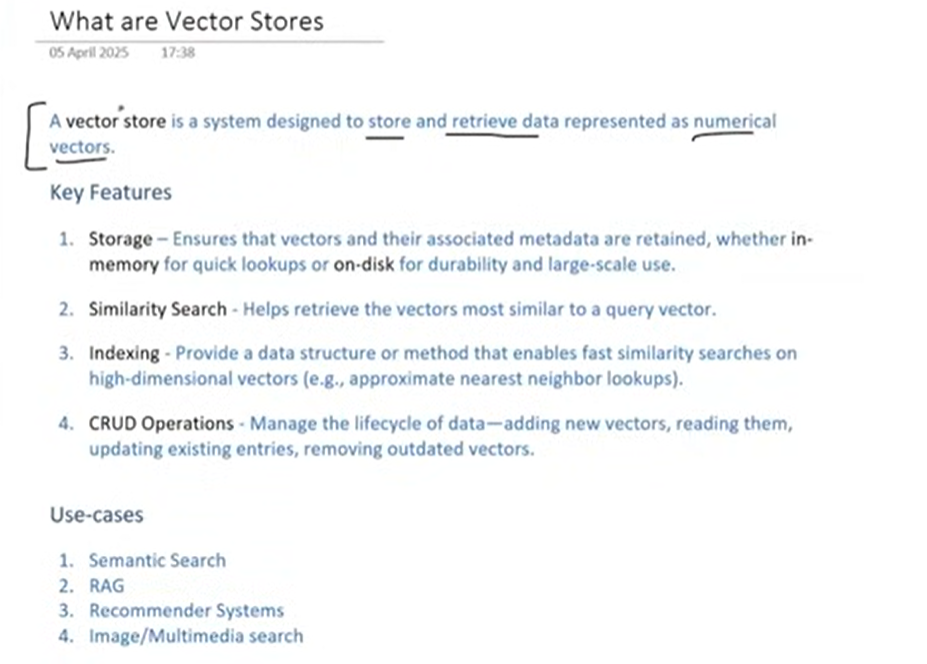

- indexing helps in  finding things.
    - Indexing ye krti hy 10 lakh vectors ke 10 cluster bna degi or sbka avg le kr comapre kre gi hamara querry vector jis ke ziada qareeb hoga us cluster ko utha kr 1 lakh comparision kre gi in easy words 10lakh ki jaha 1 lakh + 10 comparisons only
    - Nearest neighbour lookup bhi 1 tareka hota hy

# just a theory ke vector store and vector data base kia hota hy vecotr store me agr data bse feuature hn tw vector databs

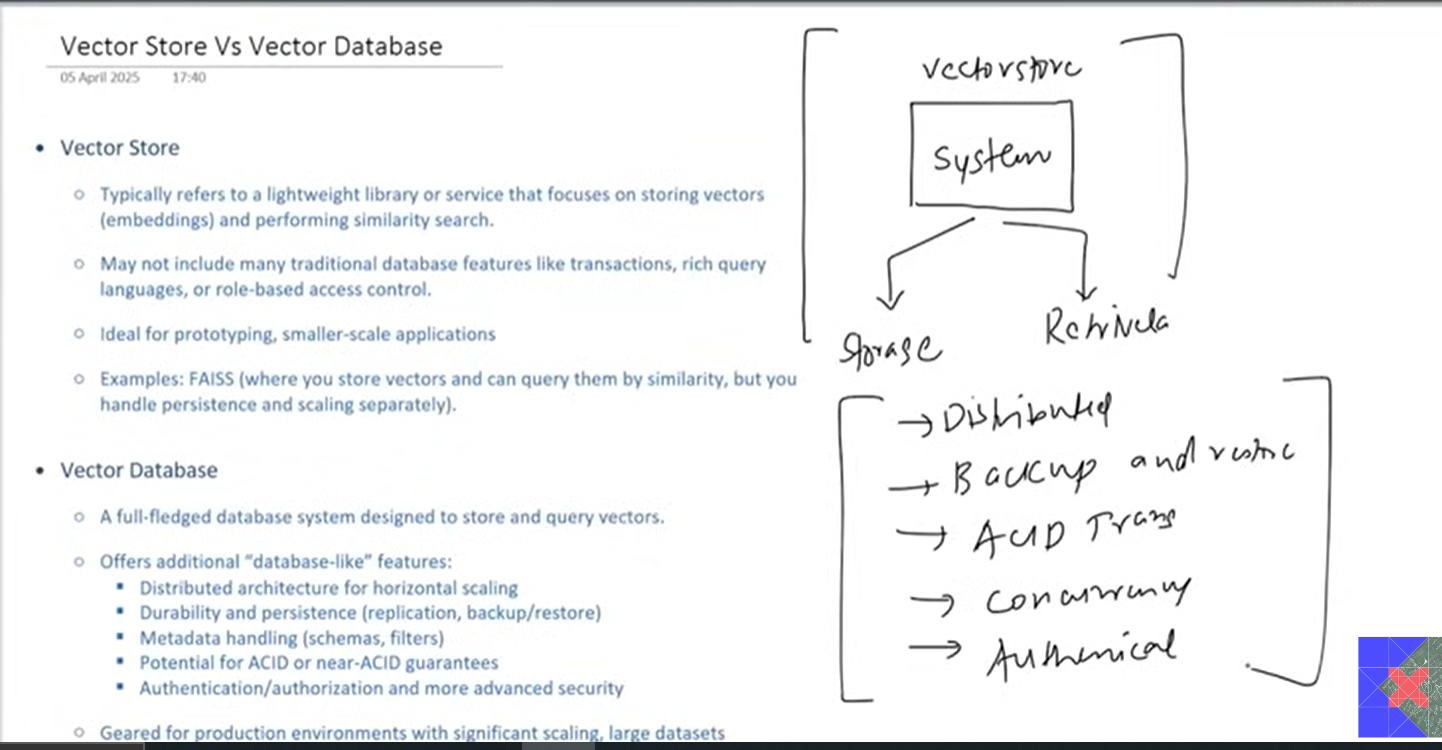

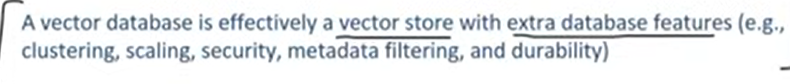

#### FIASS pr agr ap kaam kr rhy tw bht easily pinecone pr shift kr skhte ho bcz langchain ne vector banne ka tareka sb ke liye similar rkha hy same same method for each
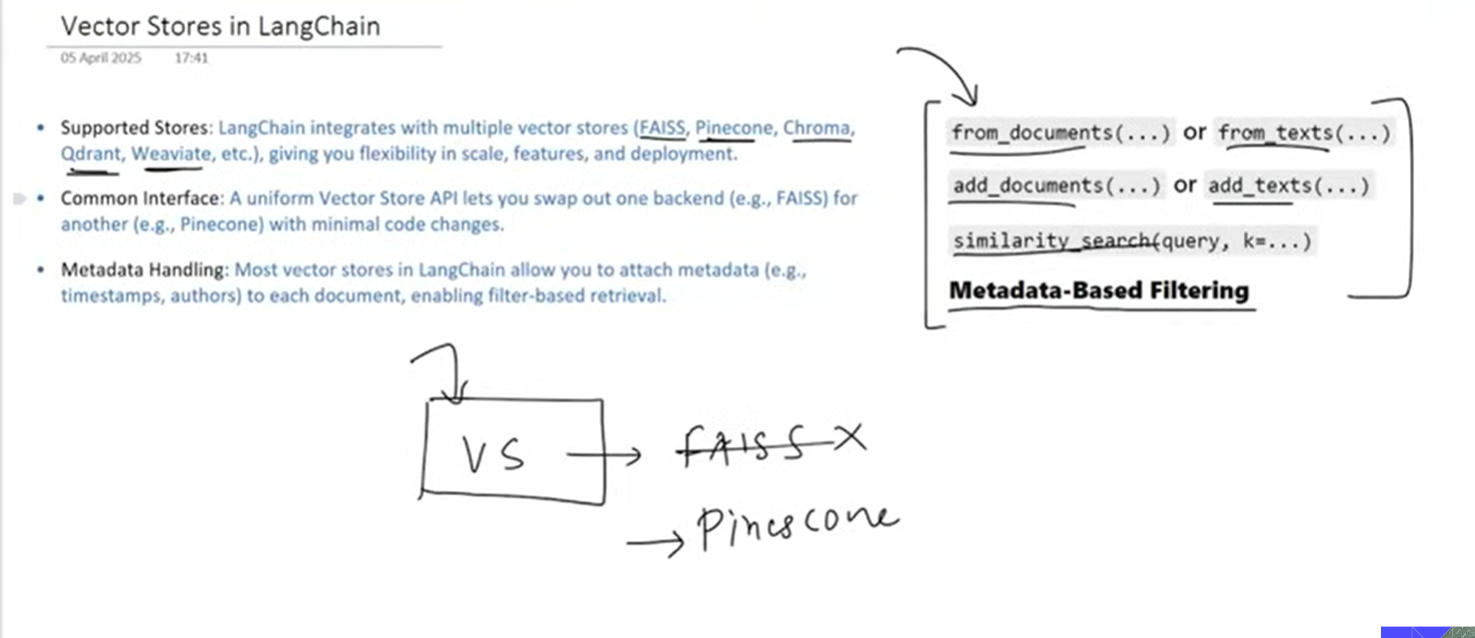

# Choroma DB (vector store and vector db ke beech ke chez hy smjho)
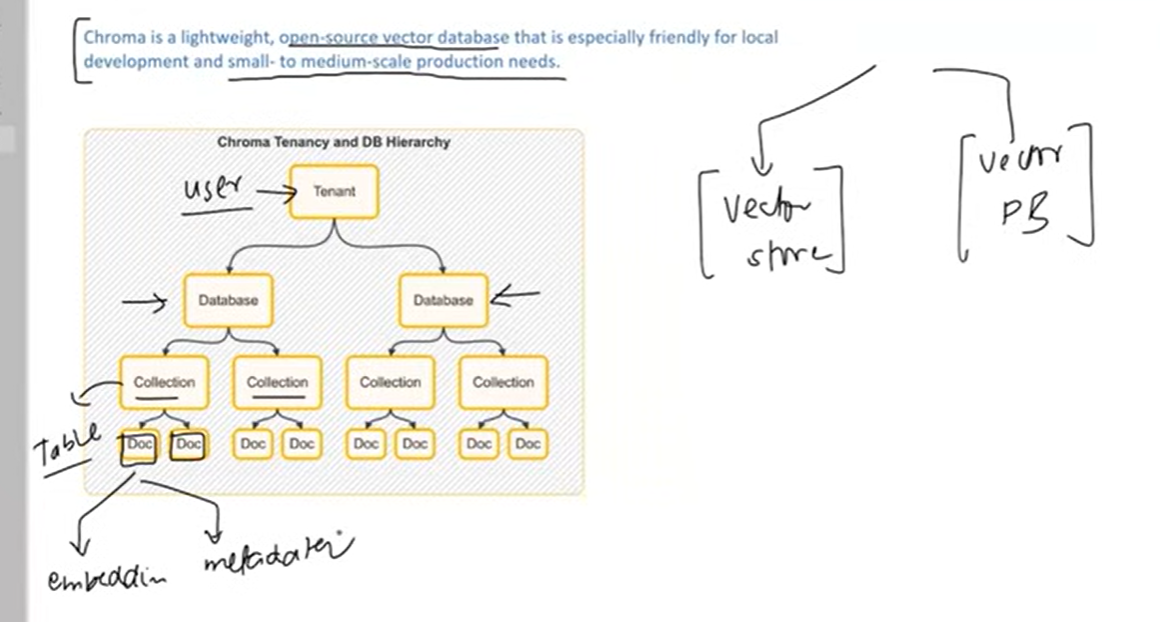

In [1]:
from langchain_openai import ChatOpenAI,OpenAIEmbeddings  # str means direct string ayegi .content kr ke nhi nikalna prga
from langchain.vectorstores import Chroma
GROQ_API_KEY = "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"
model = ChatOpenAI(
    api_key = GROQ_API_KEY,
    base_url="https://api.groq.com/openai/v1",  # Groq OpenAI-compatible endpoint
    model="llama3-8b-8192"
)

In [2]:
from langchain.schema import Document
# khud se document bna lia just learning purpose
docs1 = Document(
        page_content="Virat Kohli is an Indian cricketer and former captain of the Indian national team. He plays for Royal Challengers Bangalore in the IPL and is known as one of the best batsmen of his generation.",
        metadata={"team": "Royal Challengers Bangalore"}
    )
docs2 = Document(
        page_content="MS Dhoni, often called 'Captain Cool', leads Chennai Super Kings in the IPL. Under his captaincy, CSK has won multiple IPL titles.",
        metadata={"team": "Chennai Super Kings"}
    )
docs3 = Document(
        page_content="Rohit Sharma is an Indian international cricketer and the captain of Mumbai Indians in the IPL. He holds the record for the most IPL titles as a captain.",
        metadata={"team": "Mumbai Indians"}
    )
docs4 = Document(
        page_content="Jos Buttler is an English cricketer who plays for Rajasthan Royals in the IPL. He is known for his explosive batting at the top order.",
        metadata={"team": "Rajasthan Royals"}
    )
docs5 = Document(
        page_content="Shubman Gill is a young and dynamic batsman representing Gujarat Titans in the IPL. He was the leading run-scorer for GT in the last season.",
        metadata={"team": "Gujarat Titans"}
    )


In [3]:
docs =  [docs1,docs2,docs3 ,docs4 ,docs5 ]  # list bna rha direct bhi bna skhta tha when i created document


In [4]:
from langchain.embeddings import HuggingFaceEmbeddings
embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")

vector_store =  Chroma(
    embedding_function=embeddings,  # konsa us kr rhy  -->OpenAIEmbeddings()
    persist_directory="my_chroma_db", # path and name of new folder 
    collection_name="sample"
) # vector store bn gaya ab hum add delete update skehe gye

C:\Users\ashan\AppData\Local\Temp\ipykernel_9844\691453719.py:2: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
c:\Users\ashan\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\ashan\AppData\Local\Temp\ipykernel_9844\691453719.py:4: LangChainDeprecationWarning: The class `Chroma` was deprecated in LangChain 0.2.9 and will be removed in 1.0. An update

In [5]:
# add Document
vector_store.add_documents(docs)  # har doc ko 1 unique id assign ho jayegi (by default khud hoe hum bhi prvodie kr skhte)

['5d1558c8-bec3-4599-9425-0b92e553efed',
 'be267de0-0c30-4a28-ba76-4a6d665c52e6',
 'f306762a-3468-4266-8347-8340584ae0c3',
 '778670ff-9f92-4afe-a8bf-246a03682f42',
 'e056ebdf-588f-492d-9b37-c9c5bab68586']

In [6]:

vector_store.get(include=["embeddings","documents","metadatas"])  # jo jo dekhna hy wo bta do

{'ids': ['5d1558c8-bec3-4599-9425-0b92e553efed',
  'be267de0-0c30-4a28-ba76-4a6d665c52e6',
  'f306762a-3468-4266-8347-8340584ae0c3',
  '778670ff-9f92-4afe-a8bf-246a03682f42',
  'e056ebdf-588f-492d-9b37-c9c5bab68586'],
 'embeddings': array([[-0.0008063 ,  0.06664397, -0.01903399, ...,  0.00476483,
          0.0269528 , -0.01462755],
        [-0.12092464,  0.05014513, -0.02549797, ..., -0.04061085,
         -0.07357538, -0.01528189],
        [-0.02839589, -0.00611444, -0.03874221, ..., -0.01234914,
         -0.03880356,  0.02961109],
        [-0.0469297 ,  0.01208934, -0.03841713, ..., -0.01970387,
         -0.00359294,  0.02674538],
        [-0.08847574,  0.06227175, -0.05048099, ..., -0.04677655,
         -0.08008882,  0.01532019]], shape=(5, 384)),
 'documents': ['Virat Kohli is an Indian cricketer and former captain of the Indian national team. He plays for Royal Challengers Bangalore in the IPL and is known as one of the best batsmen of his generation.',
  "MS Dhoni, often called 'C

In [8]:
# Searching 
vector_store.similarity_search(
    query = "who  is the captain among",
    k = 2 # k ka matlab kitne chaheye
)

[Document(metadata={'team': 'Mumbai Indians'}, page_content='Rohit Sharma is an Indian international cricketer and the captain of Mumbai Indians in the IPL. He holds the record for the most IPL titles as a captain.'),
 Document(metadata={'team': 'Chennai Super Kings'}, page_content="MS Dhoni, often called 'Captain Cool', leads Chennai Super Kings in the IPL. Under his captaincy, CSK has won multiple IPL titles.")]

In [12]:
# Searching and score  score jitna kam utna acha distance dikhata ye
vector_store.similarity_search_with_score(
    query = "who  is the captain among",
    k = 5 # k ka matlab kitne chaheye
)

[(Document(metadata={'team': 'Mumbai Indians'}, page_content='Rohit Sharma is an Indian international cricketer and the captain of Mumbai Indians in the IPL. He holds the record for the most IPL titles as a captain.'),
  1.2947478294372559),
 (Document(metadata={'team': 'Chennai Super Kings'}, page_content="MS Dhoni, often called 'Captain Cool', leads Chennai Super Kings in the IPL. Under his captaincy, CSK has won multiple IPL titles."),
  1.390599012374878),
 (Document(metadata={'team': 'Gujarat Titans'}, page_content='Shubman Gill is a young and dynamic batsman representing Gujarat Titans in the IPL. He was the leading run-scorer for GT in the last season.'),
  1.472076177597046),
 (Document(metadata={'team': 'Royal Challengers Bangalore'}, page_content='Virat Kohli is an Indian cricketer and former captain of the Indian national team. He plays for Royal Challengers Bangalore in the IPL and is known as one of the best batsmen of his generation.'),
  1.4865212440490723),
 (Document(m

In [16]:
vector_store.similarity_search_with_score(
    query = "",
    filter = {"team" : "Royal Challengers Bangalore"},  # meta data pr search
    
)

[(Document(metadata={'team': 'Royal Challengers Bangalore'}, page_content='Virat Kohli is an Indian cricketer and former captain of the Indian national team. He plays for Royal Challengers Bangalore in the IPL and is known as one of the best batsmen of his generation.'),
  1.8576728105545044)]

In [17]:
updated_doc1 = Document(
    page_content= "Virat kohli is indian number 1 better he plays in Royal Challengers Bangalore (RCB) in IPL he won 2025 ipl ",
    metadata={"team":"Royal Challengers Bangalore"}
)

In [18]:
vector_store.update_document(document_id="5d1558c8-bec3-4599-9425-0b92e553efed",document=updated_doc1)  # id lelo .get se

In [19]:
vector_store.get()

{'ids': ['5d1558c8-bec3-4599-9425-0b92e553efed',
  'be267de0-0c30-4a28-ba76-4a6d665c52e6',
  'f306762a-3468-4266-8347-8340584ae0c3',
  '778670ff-9f92-4afe-a8bf-246a03682f42',
  'e056ebdf-588f-492d-9b37-c9c5bab68586'],
 'embeddings': None,
 'documents': ['Virat kohli is indian number 1 better he plays in Royal Challengers Bangalore (RCB) in IPL he won 2025 ipl ',
  "MS Dhoni, often called 'Captain Cool', leads Chennai Super Kings in the IPL. Under his captaincy, CSK has won multiple IPL titles.",
  'Rohit Sharma is an Indian international cricketer and the captain of Mumbai Indians in the IPL. He holds the record for the most IPL titles as a captain.',
  'Jos Buttler is an English cricketer who plays for Rajasthan Royals in the IPL. He is known for his explosive batting at the top order.',
  'Shubman Gill is a young and dynamic batsman representing Gujarat Titans in the IPL. He was the leading run-scorer for GT in the last season.'],
 'uris': None,
 'included': ['metadatas', 'documents'

In [23]:
vector_store.similarity_search(
    query="who won  ipl",
    k=1
)

[Document(metadata={'team': 'Chennai Super Kings'}, page_content="MS Dhoni, often called 'Captain Cool', leads Chennai Super Kings in the IPL. Under his captaincy, CSK has won multiple IPL titles.")]

In [24]:
vector_store.delete(ids = ["5d1558c8-bec3-4599-9425-0b92e553efed"])

In [27]:
vector_store.get()

{'ids': ['be267de0-0c30-4a28-ba76-4a6d665c52e6',
  'f306762a-3468-4266-8347-8340584ae0c3',
  '778670ff-9f92-4afe-a8bf-246a03682f42',
  'e056ebdf-588f-492d-9b37-c9c5bab68586'],
 'embeddings': None,
 'documents': ["MS Dhoni, often called 'Captain Cool', leads Chennai Super Kings in the IPL. Under his captaincy, CSK has won multiple IPL titles.",
  'Rohit Sharma is an Indian international cricketer and the captain of Mumbai Indians in the IPL. He holds the record for the most IPL titles as a captain.',
  'Jos Buttler is an English cricketer who plays for Rajasthan Royals in the IPL. He is known for his explosive batting at the top order.',
  'Shubman Gill is a young and dynamic batsman representing Gujarat Titans in the IPL. He was the leading run-scorer for GT in the last season.'],
 'uris': None,
 'included': ['metadatas', 'documents'],
 'data': None,
 'metadatas': [{'team': 'Chennai Super Kings'},
  {'team': 'Mumbai Indians'},
  {'team': 'Rajasthan Royals'},
  {'team': 'Gujarat Titans'

In [28]:
# Fiass pinecone khud try kro